In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Q1


**(a)**

Text(0, 0.5, 'f(x) = x^3 + 1')

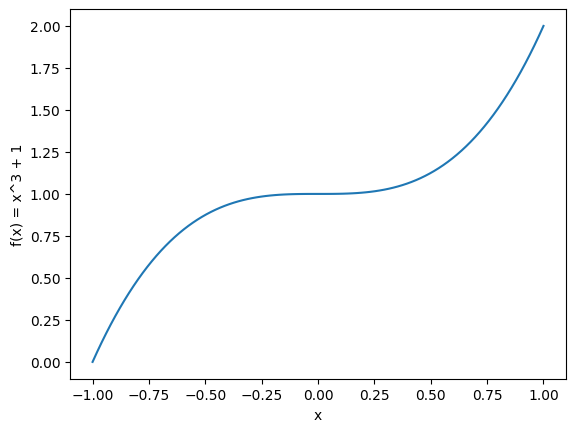

In [24]:
# Define the function
def f(x):
    return (np.power(x, 3) + 1)

# Generate x values in the specified domain
x = np.linspace(-1, 1, 100)

# Calculate corresponding y values using the function
y = f(x)

# Plot the true function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x) = x^3 + 1')

**(b)**

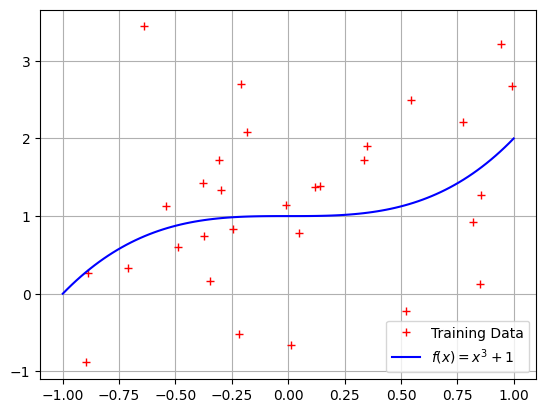

In [33]:
# Create the sample training set
np.random.seed(50)  # for reproducibility

# Generate 100 random x values in the specified domain
train_x = np.random.uniform(-1, 1, 30) # specify the parameters correctly

# Genearte noise with same size as that of the data.
noise = np.random.normal(0, 1, 30) # specify the parameters correctly

# Evaluate the true function at each input value and add Gaussian random noise
train_y = f(train_x) + noise

# Plot the noisy data points (sample training data)
plt.plot(train_x, train_y, '+', color='red', label='Training Data')

# Plot the true function
plt.plot(x, y, label=r'$f(x) = x^3 + 1$', color='blue')

# Add labels and legend
plt.legend()
plt.grid(True)
plt.show()

**(c)**

In [40]:
# Perform linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Reshape the data for sklearn (if needed)
train_x = train_x.reshape(-1,1)
# Perform linear regression
lin_reg = LinearRegression().fit(train_x, train_y)
# Predict y values on training data using the linear model
predict_y = lin_reg.predict(train_x)
print(predict_y)
# Calculate the sum of squares error
error = mean_squared_error(train_y, predict_y)
print(error)

[1.17121635 0.83106745 0.86602545 1.04579534 1.02152736 1.81186755
 1.06094118 1.52511551 1.51062055 0.93562723 0.98225165 0.98891837
 0.72562703 1.78135258 1.70032716 1.25462738 0.94019805 1.67355311
 1.40090799 1.03910456 1.18727496 1.20886861 1.72434969 1.26919721
 1.39294983 0.60666849 0.95738498 0.611956   0.76948064 1.72171068]
1.068860902445247


**(d)**

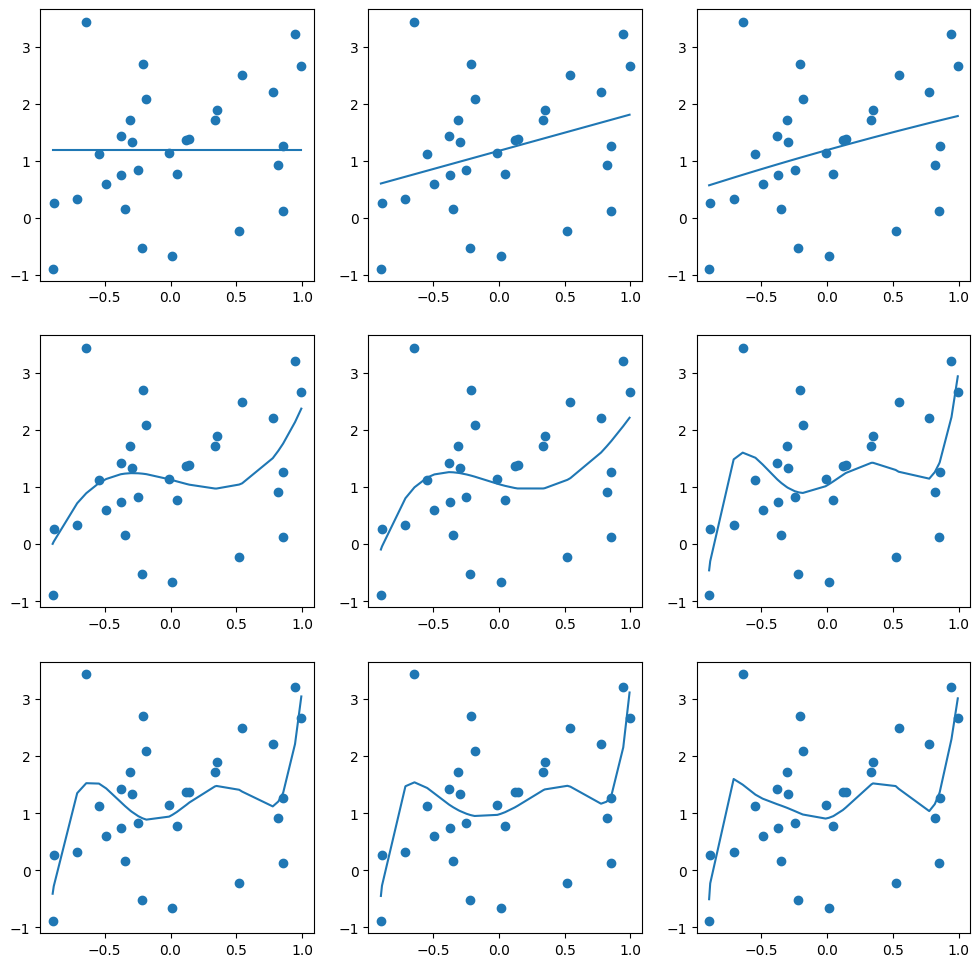

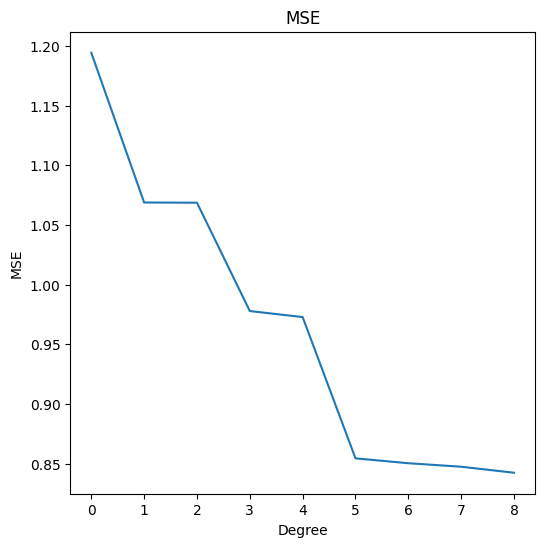

In [53]:
# Perform polynomial regression
from sklearn.preprocessing import PolynomialFeatures

mses = [] # Store MSE for each degree for visualization (optional)

plt.figure(figsize=(12,12))

# Experiment with different polynomial orders
for degree in range(9):
  plt.subplot(3,3,degree+1)

  # Polynomial regression
  poly_reg = PolynomialFeatures(degree).fit_transform(train_x, train_y)

  poly_lin_reg = LinearRegression().fit(poly_reg, train_y)
  # Predict y values using the polynomial model
  poly_predict_y = poly_lin_reg.predict(poly_reg)

  # Calculate the sum of squares error
  mse = mean_squared_error(train_y, poly_predict_y)
  mses.append(mse)

  sorted_indices = np.argsort(train_x.flatten())
  sorted_x = train_x[sorted_indices]
  sorted_y_pred = poly_predict_y[sorted_indices]

  # Plot the polynomial function for current degree

  plt.plot(sorted_x, sorted_y_pred)
  plt.scatter(train_x, train_y)

# Plot MSE
plt.figure(figsize=(6,6))
plt.plot(np.arange(0, 9, 1), mses)
plt.title('MSE')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.show()

# Q2

**(b)**

In [ ]:
# Load the dataset
data = pd.read_csv("pokemonregr.csv")

# Handle missing data - impute/drop/etc. (justify your choices)

# Define X, y

# Define linear regression model

**(c)**

In [ ]:
# Print the coefficients of the trained Linear Model
# (hint: look at the documentation of LinearRegression() method in sklearn)

,0,1
0,attack,0.357074
1,defense,0.551564
2,height_m,53.843880
3,sp_attack,0.015288
4,sp_defense,0.158542
5,speed,-0.394064


**(e)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize features

# Define X, y for normalized features

# Define linear regression model

# What are the coefficients of the new model

,0,1
0,attack,0.064286
1,defense,0.124127
2,height_m,0.775507
3,sp_attack,0.002814
4,sp_defense,0.033300
5,speed,-0.068975


# Q3

**(a)**

In [ ]:
# Library
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
# load dataset
df = pd.read_csv('w3classif.csv', header=None)

# Define X, y
X, y = df[df.columns[:-1]], df[df.columns[-1]]

In [ ]:
# Standardize the features (optional but often recommended for logistic regression)

# Create and fit the logistic regression model

# Print the model parameters (coefficients and intercept)
print("Model Coefficients:", logreg_model.coef_)
print("\nModel Intercept:",logreg_model.intercept_)

Model Coefficients: [[2.90611866 3.0174738 ]]

Model Intercept: [0.60011651]


**(b)**

In [ ]:
# Standardize the test data point using the same scaler (if using Standardization above)


# Predict the probability of class 1 for the test data point
probability_y1 =
print("Probability p(y' = 1 | x'):", probability_y1)

Probability p(y' = 1 | x'): [0.32754319]


**(c)**

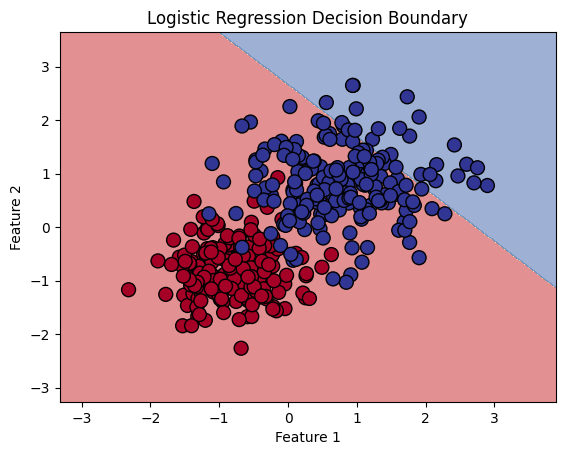

In [ ]:
# Generate a meshgrid of points for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Standardize the meshgrid points using the same scaler
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
meshgrid_points_scaled = scaler.transform(meshgrid_points)

# Predict the class labels for the meshgrid points

# Reshape the predictions to match the shape of the meshgrid

# Plot the decision boundary and data points
plt.contourf(xx, yy, predictions, cmap='RdYlBu', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='k', marker='o', s=100)

# Plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')

# Show the plot
plt.show()